# 데이터분석기초 Project: 부자가 될 수 있을까?

## 2019311711 조서연

# I. EDA & 시각화

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult.csv')

# 기본 정보 보기
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [2]:
df.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [3]:
df[df['native.country'] == '?'].shape

(583, 15)

In [4]:
# 각 열마다 "?" 갯수 출력
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
1836
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education.num
0
The Value Counts of ? in marital.status
0
The Value Counts of ? in occupation
1843
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital.gain
0
The Value Counts of ? in capital.loss
0
The Value Counts of ? in hours.per.week
0
The Value Counts of ? in native.country
583
The Value Counts of ? in income
0


In [5]:
# occupation 에서의 '?' 모두 drop
df = df[df.occupation != '?']

# native.country 에서의 '?' 모두 drop
df = df[df['native.country'] != '?']

# workclass 에서의 '?' 모두 drop
df = df[df.workclass != '?']

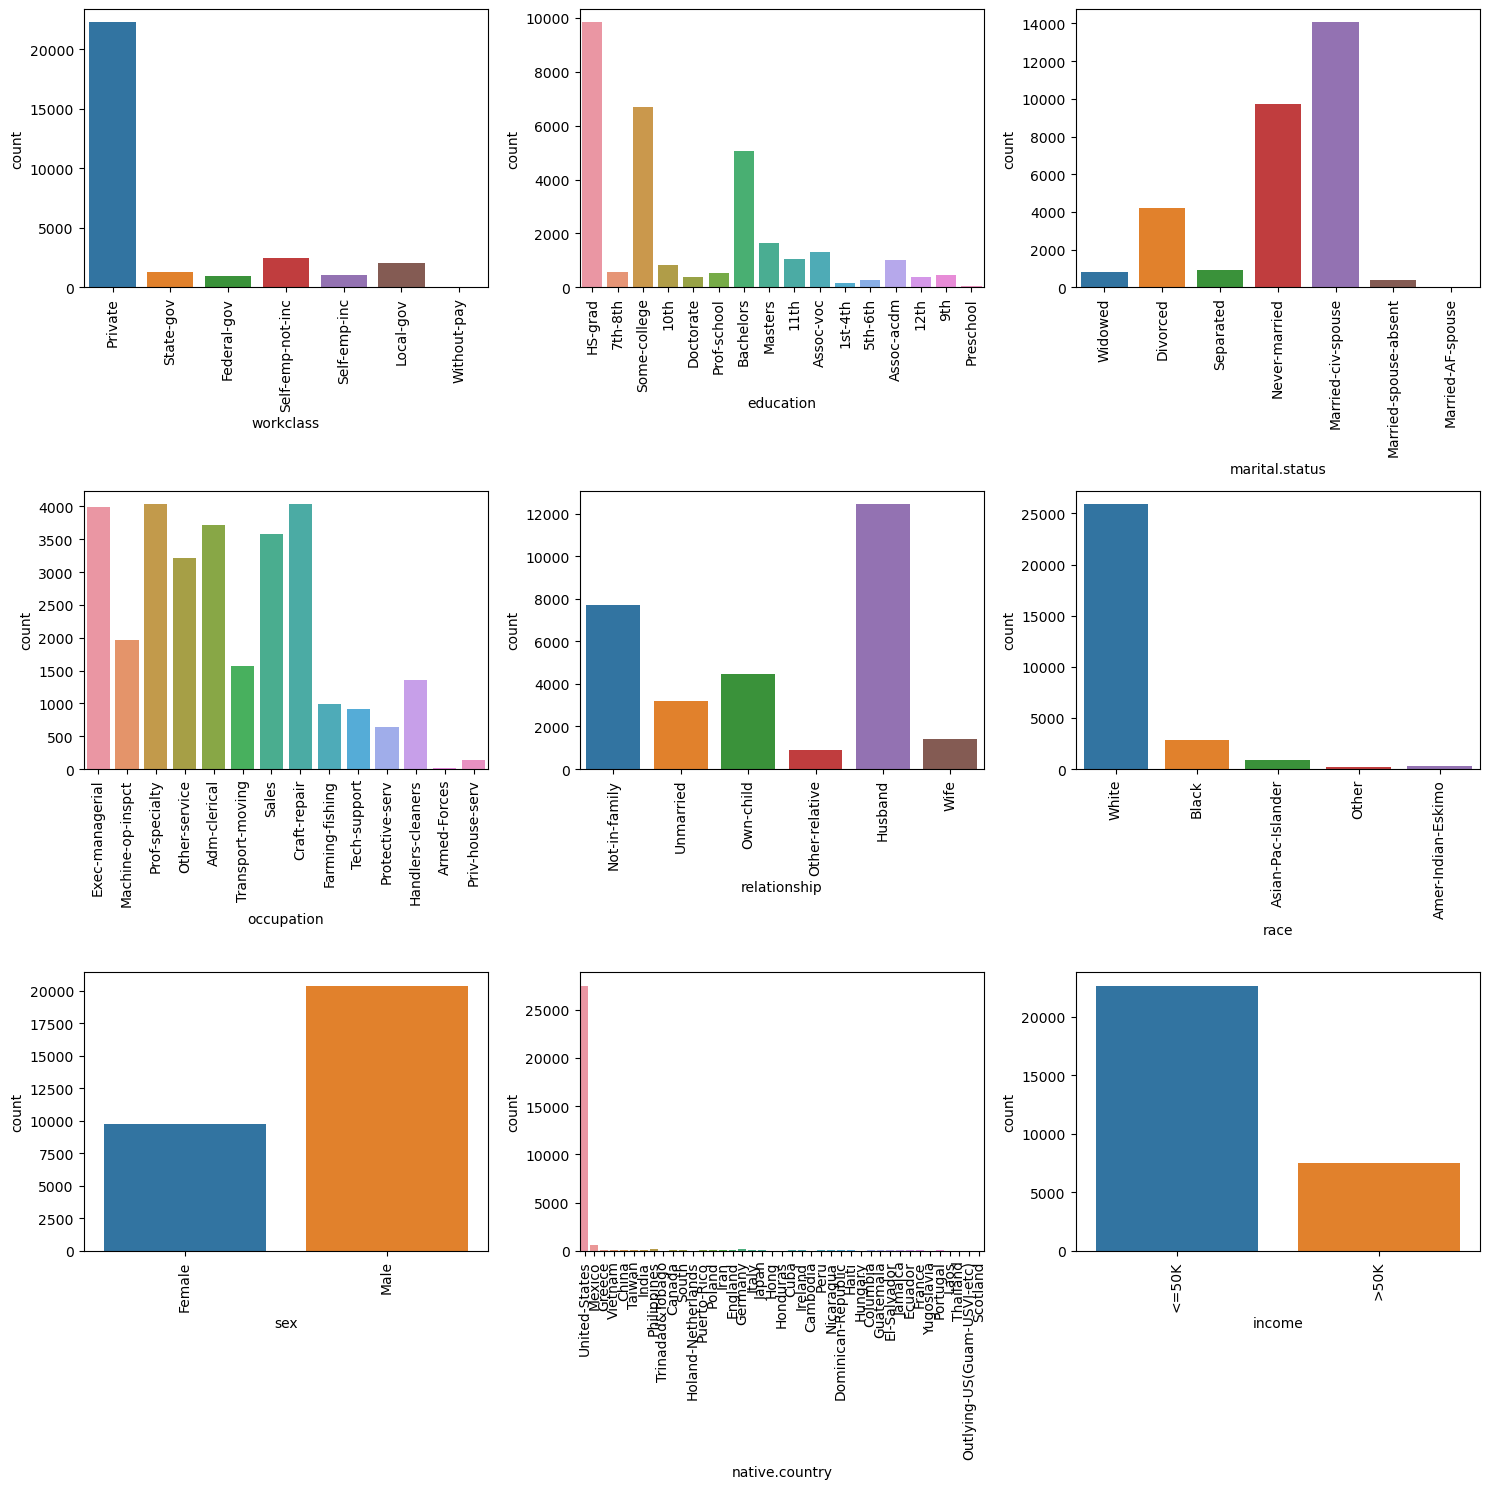

In [6]:
# 각 카테고리별 막대그래프
cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 
            'relationship', 'race', 'sex', 'native.country', 'income']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=90)
    
plt.tight_layout()
plt.show()

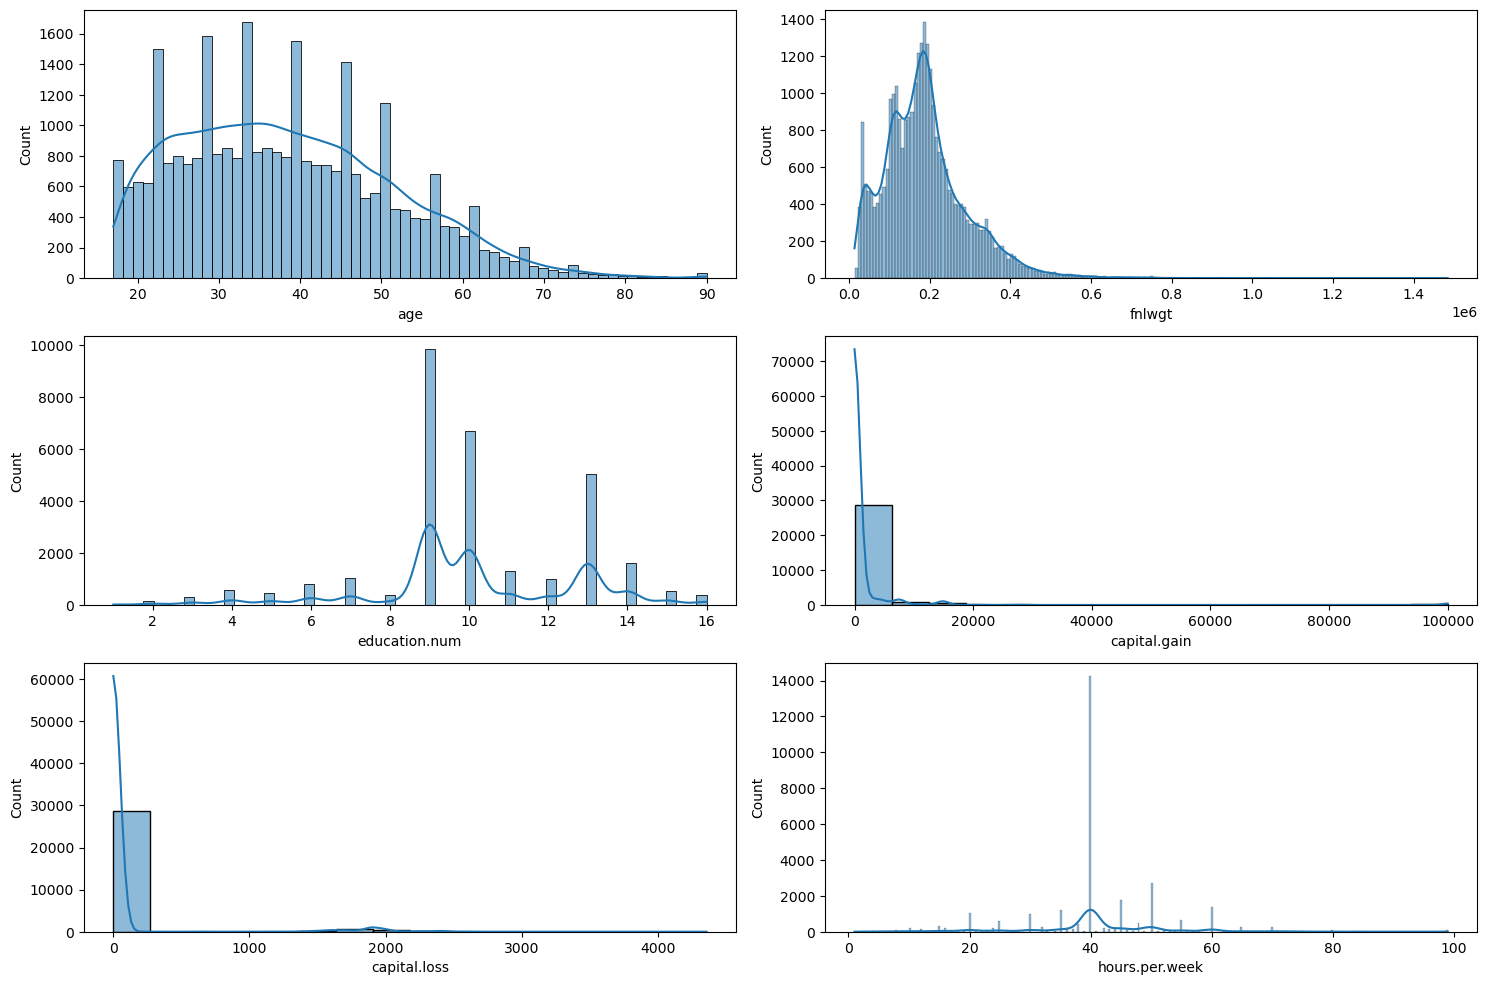

In [7]:
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axes[i//2, i%2], kde=True)
plt.tight_layout()
plt.show()

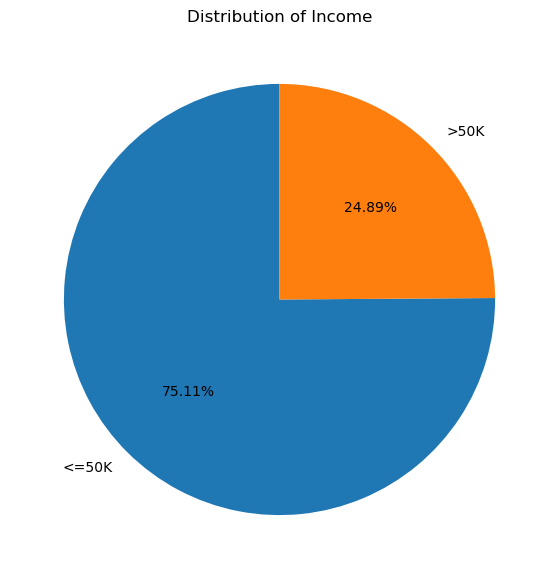

In [8]:
# income 열의 값 count
income_counts = df['income'].value_counts()

labels = income_counts.index
sizes = income_counts.values

# 파이 그래프 그리기
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Distribution of Income")
plt.show()


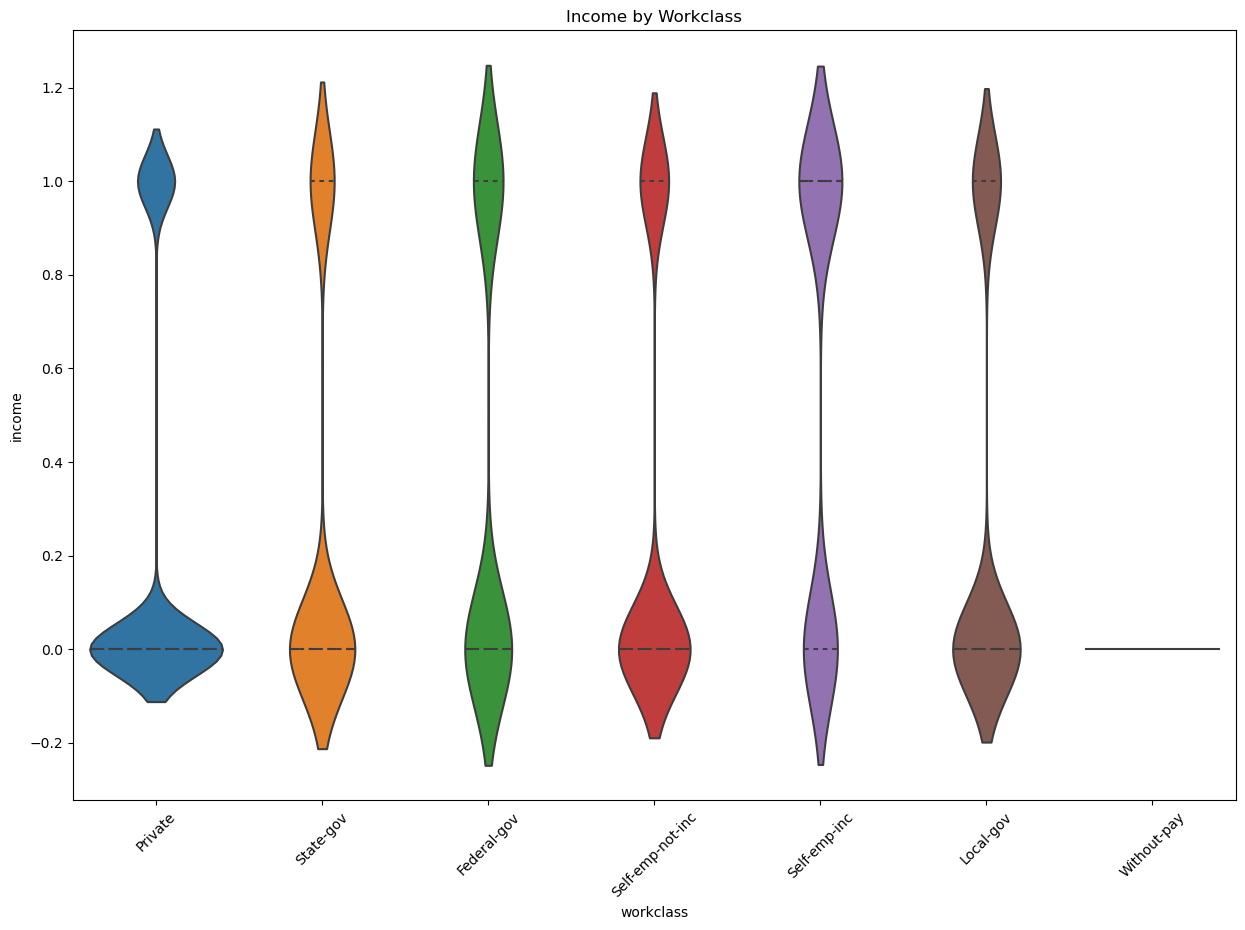

In [9]:
# 데이터를 가공하여 income 열을 0 또는 1로 변환
df['income'] = df['income'].apply(lambda x: 1 if x == ">50K" else 0)

# 바이올린 플롯을 이용하여 workclass와 income 간의 관계 시각화
plt.figure(figsize=(15, 10))
sns.violinplot(x='workclass', y='income', data=df, inner="quart")
plt.title("Income by Workclass")
plt.xticks(rotation=45)
plt.show()

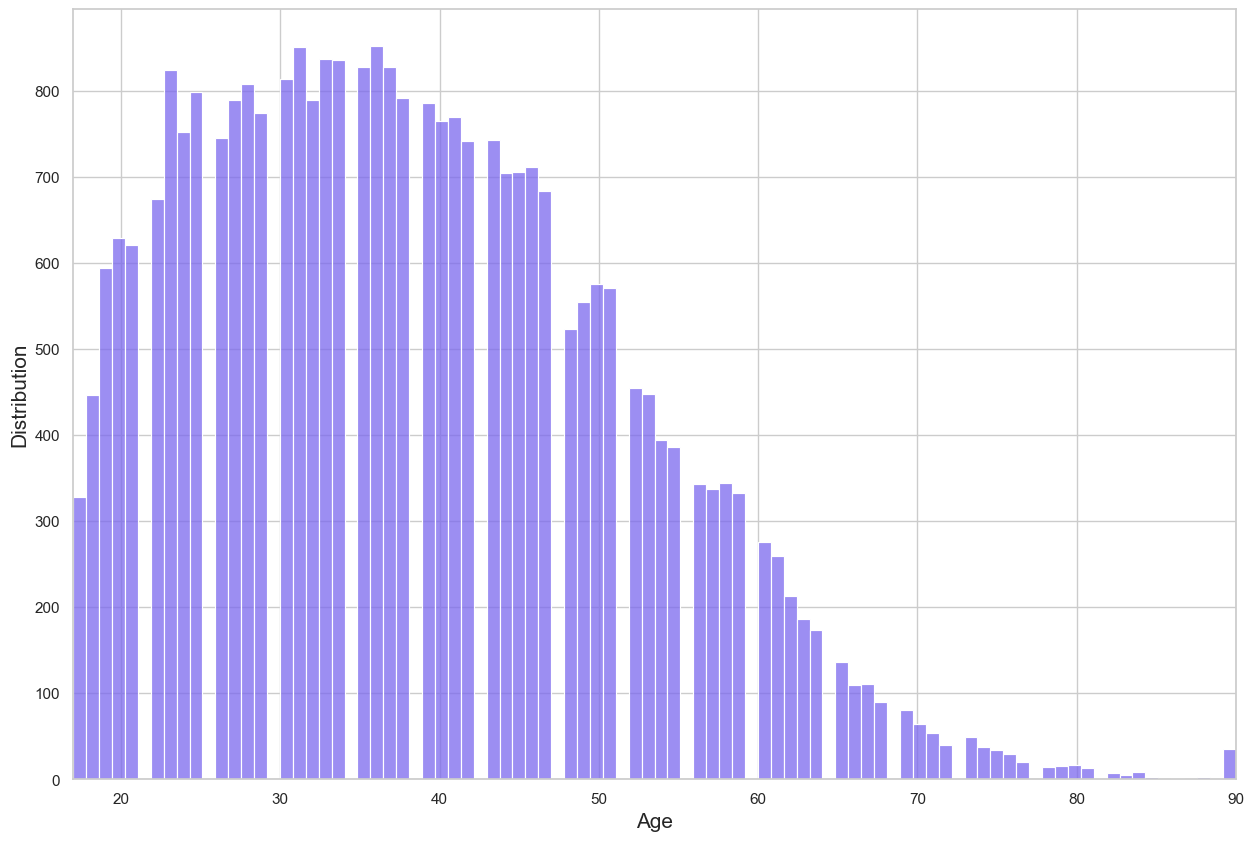

Minimum age:  17
Maximum age:  90


In [10]:
# 연령별 분포
plt.rcParams['figure.figsize'] = [15, 10]
sns.set(style = 'whitegrid')

sns.histplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)
plt.show()

print ("Minimum age: ", df['age'].min())
print ("Maximum age: ", df['age'].max())


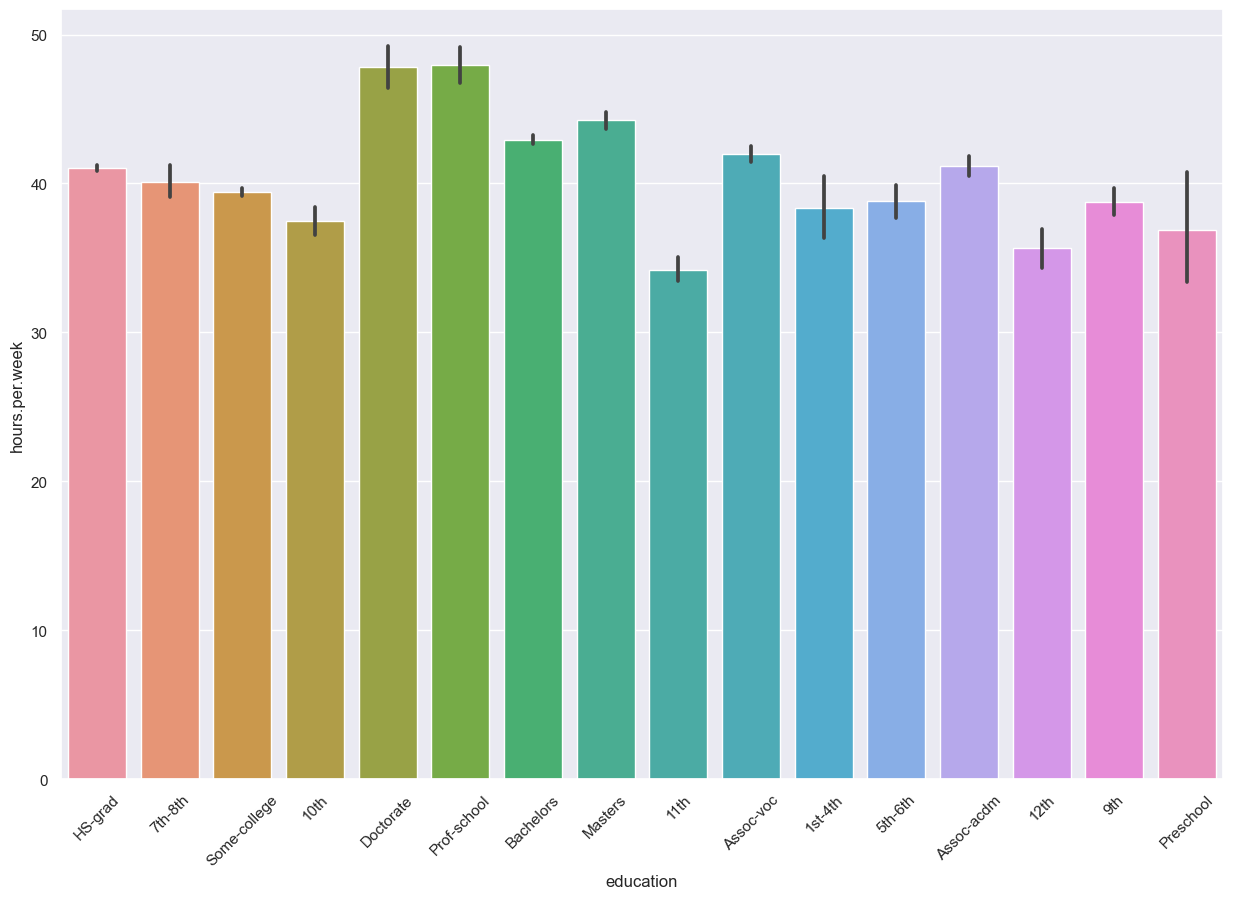

In [11]:
# hours.per.week과 education 그래프

sns.set(rc={'figure.figsize':(15,10)})
sns_grad = sns.barplot(x = df['education'], y = df['hours.per.week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=45);
plt.show()

<Axes: xlabel='age', ylabel='Count'>

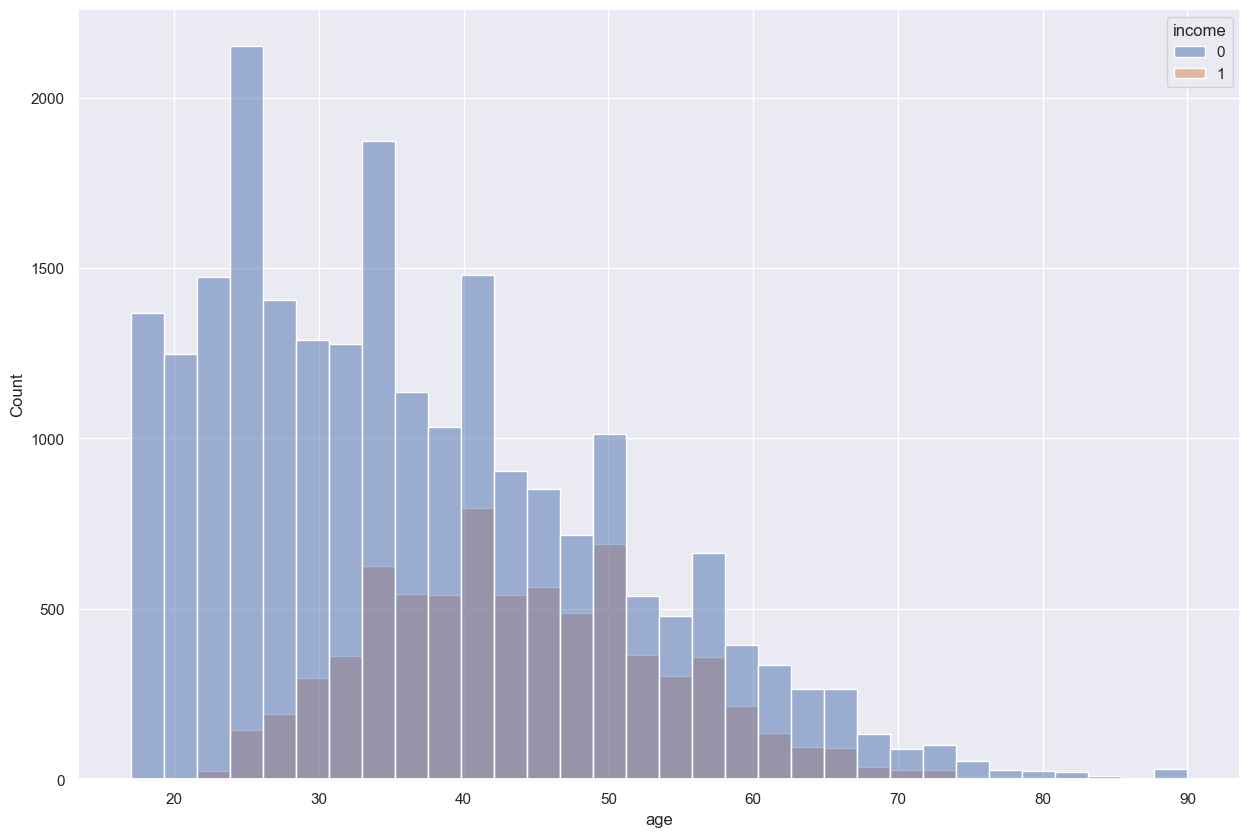

In [12]:
# 0: <=50K, 1: >50K
sns.histplot(df, x='age', hue='income', bins= 32)

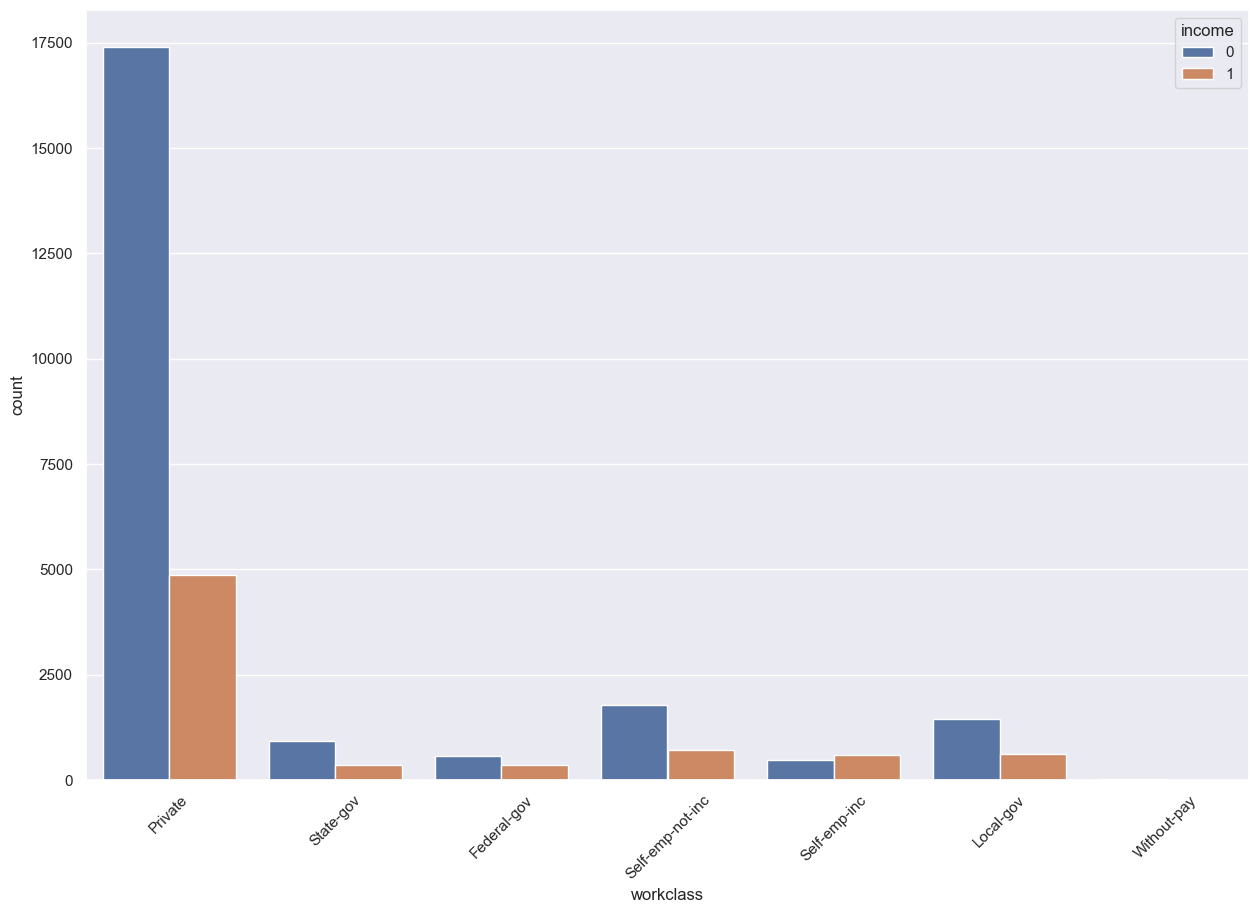

In [13]:
# workclass count 그래프
sns.countplot(data = df, x = 'workclass', hue = 'income')
plt.tick_params(axis='x', rotation=45)

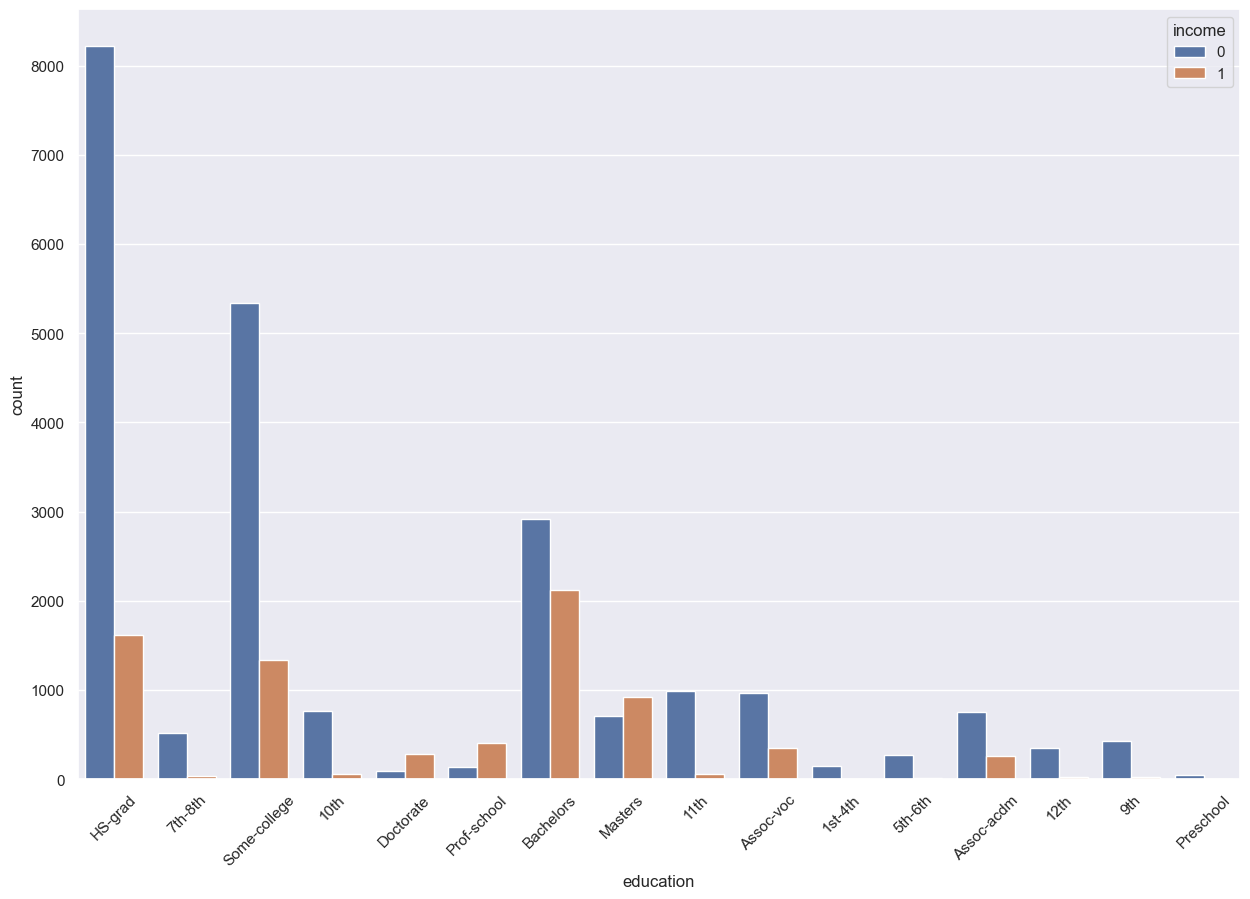

In [14]:
# education count 그래프
sns.countplot(data = df, x = 'education', hue = 'income')
plt.tick_params(axis='x', rotation=45)

# II. Machine Learning Models: 
# Logistic Regression, Random Forest, Support Vector Machine

## 1. 데이터 전처리

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [16]:
# 데이터 전처리
df_adult = pd.read_csv('adult.csv')
df_adult = df_adult.reset_index(drop = True)
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
# Occupations 인덱스에 ? 값 처리하기

# occupation 에서의 '?' 모두 drop
df_adult = df_adult[df_adult.occupation != '?']

# native.country 에서의 '?' 모두 drop
df_adult = df_adult[df_adult['native.country'] != '?']

# workclass 에서의 '?' 모두 drop
df_adult = df_adult[df_adult.workclass != '?']
print (df_adult['occupation'].value_counts())

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64


In [19]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [20]:
# Income 열을 string -> num 으로 바꾸기

df_adult['income'] = df_adult['income'].map({'<=50K':0, '>50K':1})
df_adult['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [21]:
# 카테고리 값을 수치화 시키기 (Categorical Values to Numerical values)

from sklearn.preprocessing import LabelEncoder

categorical_features = list(df_adult.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df_adult[feature] = label_encoder_feat[feature].fit_transform(df_adult[feature])

df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


In [22]:
from sklearn.utils import shuffle

df_adult = shuffle(df_adult)

# train set과 test set으로 나누기
from sklearn.model_selection import train_test_split

features_ = df_adult.drop(columns = ['income', 'education.num'])
target = df_adult['income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (21113, 13)
Test data set size :  (9049, 13)


In [23]:
# 중복 버리기

print("Initial shape : ", df.shape)
df = df.drop_duplicates(keep = 'first')
print ("Shape of the dataset (중복 삭제후) : ", df.shape)
print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Initial shape :  (30162, 15)
Shape of the dataset (중복 삭제후) :  (30139, 15)
Train data set size :  (21113, 13)
Test data set size :  (9049, 13)


## 2. Machine Learning

### 2.1 Logistic Regression

In [24]:
# 모델 학습
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# 예측
pred_1 = model_1.predict(X_test)

print ("The accuracy of Logistic Regression : ",accuracy_score(y_test, pred_1))
print ("The f1 score of Logistic Regression : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of Logistic Regression :  0.78240689578959
The f1 score of Logistic Regression :  0.3909681410454686


### 2.2 Random Forest Classifier

In [25]:
# 모델 학습
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# 예측
pred_2 = model_2.predict(X_test)

print ("The accuracy of Random Forest Classifier : ",accuracy_score(y_test, pred_2))
print ("The f1 score of Random Forest Classifier : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of Random Forest Classifier :  0.8507017349983423
The f1 score of Random Forest Classifier :  0.6720077688759407


### 2.3 Support Vector Machine

In [26]:
# 모델 학습
svc = SVC(kernel = 'rbf', max_iter = 1000, probability = True)
model_3 = svc.fit(X_train, y_train)

# 예측
pred_3 = model_3.predict(X_test)

print ("The accuracy of Support Vector Machine : ",accuracy_score(y_test, pred_3))
print ("The f1 score of Support Vector Machine : ", f1_score(y_test, pred_3, average = 'binary'))

The accuracy of Support Vector Machine :  0.3550668582163775
The f1 score of Support Vector Machine :  0.3811240721102863


## 3. 결과 분석

In [27]:
list_pred = [pred_1, pred_2, pred_3]
model_names = ["Logistic Regression", "Random Forest", "Support Vector Machine"]

for i, predictions in enumerate(list_pred) :
    print ("==========================", model_names[i], "==========================")
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

========================== Logistic Regression ==========================

              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      6810
        >50K       0.64      0.28      0.39      2239

    accuracy                           0.78      9049
   macro avg       0.72      0.61      0.63      9049
weighted avg       0.76      0.78      0.75      9049

========================== Random Forest ==========================

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6810
        >50K       0.74      0.62      0.67      2239

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049

========================== Support Vector Machine ==========================

              precision    recall  f1-score   support

       <=50K       0.76      0.21      0.33      6810
        >50K   